In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/xg/5n69np453nn3pzzpyw20jrp40000gn/T/ipykernel_75876/1362839974.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../data/complaints.csv')


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


,Complaint ID
count,4.838845e+06
mean,4.912034e+06
std,2.300897e+06
min,1.000000e+00
25%,3.132280e+06
50%,5.073670e+06
75%,6.947824e+06
max,8.525964e+06


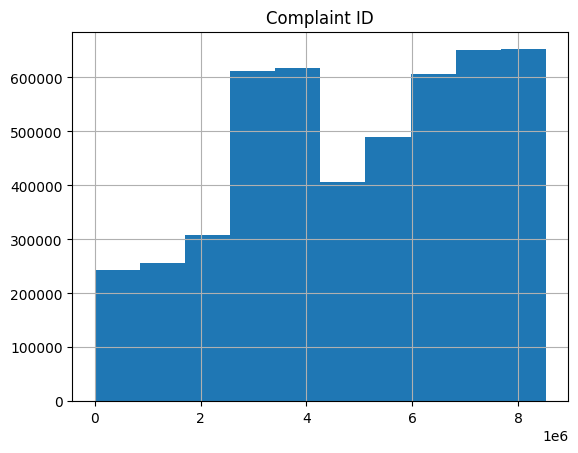

In [2]:
data = pd.read_csv('../../data/complaints.csv')
print(data.columns)
data.hist()
data.describe()

In [3]:
data

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-22,Credit card,General-purpose credit card or charge card,Problem with a company's investigation into an...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,TX,75287,NaN,Other,Web,2024-02-22,In progress,Yes,NaN,8390737
1,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,NaN,AMERICAN EXPRESS COMPANY,NJ,07480,NaN,NaN,Web,2024-02-28,Closed with explanation,Yes,NaN,8436894
2,2024-02-23,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Information belongs to someone else,NaN,NaN,TRUIST FINANCIAL CORPORATION,TX,76712,Older American,NaN,Web,2024-02-23,In progress,Yes,NaN,8404438
3,2024-02-22,Debt collection,Credit card debt,Written notification about debt,Didn't receive notice of right to dispute,NaN,NaN,ENCORE CAPITAL GROUP INC.,NY,12601,NaN,NaN,Web,2024-02-22,In progress,Yes,NaN,8391210
4,2024-02-29,Credit card,General-purpose credit card or charge card,Fees or interest,Problem with fees,NaN,Company believes it acted appropriately as aut...,Atlanticus Services Corporation,NY,10573,NaN,NaN,Referral,2024-02-29,Closed with monetary relief,Yes,NaN,8444868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838840,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",TX,76036,NaN,Other,Web,2023-08-02,Closed with non-monetary relief,Yes,NaN,7337991
4838841,2023-08-02,"Payday loan, title loan, or personal loan",Installment loan,Problem with additional add-on products or ser...,NaN,NaN,NaN,NBT BANCORP INC.,NJ,08046,NaN,NaN,Phone,2023-08-02,Closed with explanation,Yes,NaN,7343156
4838842,2023-08-02,Mortgage,FHA mortgage,Struggling to pay mortgage,NaN,NaN,Company believes it acted appropriately as aut...,Chesmar Homes,TX,77316,NaN,Other,Web,2023-08-17,Closed with explanation,Yes,NaN,7340709
4838843,2023-08-02,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",GA,30013,NaN,Consent not provided,Web,2023-08-02,Closed with explanation,Yes,NaN,7341166


# Standardizing

Standardizing continous features - distances and ratios have very different ranges

In [6]:
from sklearn.preprocessing import StandardScaler

continuous_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']
scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Balancing

https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

Should do some balancing on the binary features - use [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) in imblearn library

SMOTENC has been the best (results wise)

In [7]:
X = data.drop(columns=['fraud'])
y = data['fraud']

X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.274163e-16,6.134027e-17,-2.633751e-16,0.881536,0.350399,0.100608,0.650552
std,1.000001e+00,1.000001e+00,1.000001e+00,0.323157,0.477095,0.300809,0.476796
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000,0.000000,0.000000,0.000000
25%,-3.479205e-01,-1.834088e-01,-4.816812e-01,1.000000,0.000000,0.000000,0.000000
50%,-2.547919e-01,-1.562457e-01,-2.952096e-01,1.000000,0.000000,0.000000,1.000000
75%,-1.353107e-02,-6.503759e-02,9.722443e-02,1.000000,1.000000,0.000000,1.000000
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>, <Axes: >, <Axes: >]],
      dtype=object)

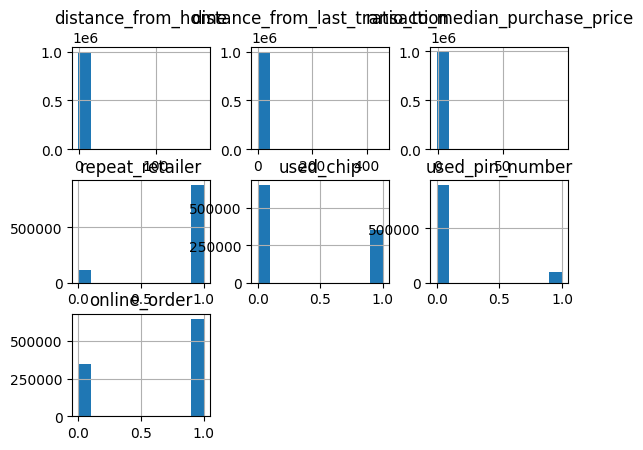

In [8]:
X.hist()

In [9]:
from imblearn.over_sampling import ADASYN

# this takes a lot longer
# X, y = SMOTENC(categorical_features=[3,4,5,6]).fit_resample(X, y)
X, y = ADASYN().fit_resample(X, y)
# y.hist()

In [10]:
X.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06,1.825194e+06
mean,2.714609e-01,1.319326e-01,6.729069e-01,8.809255e-01,3.074928e-01,5.645044e-02,7.845391e-01
std,1.561827e+00,1.447052e+00,1.684345e+00,3.238762e-01,4.614554e-01,2.307895e-01,4.111418e-01
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-3.435609e-01,-1.825935e-01,-4.051028e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,-2.284131e-01,-1.544437e-01,6.689256e-02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.671863e-01,-4.939226e-02,1.217533e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'distance_from_home'}>,
        <Axes: title={'center': 'distance_from_last_transaction'}>,
        <Axes: title={'center': 'ratio_to_median_purchase_price'}>],
       [<Axes: title={'center': 'repeat_retailer'}>,
        <Axes: title={'center': 'used_chip'}>,
        <Axes: title={'center': 'used_pin_number'}>],
       [<Axes: title={'center': 'online_order'}>, <Axes: >, <Axes: >]],
      dtype=object)

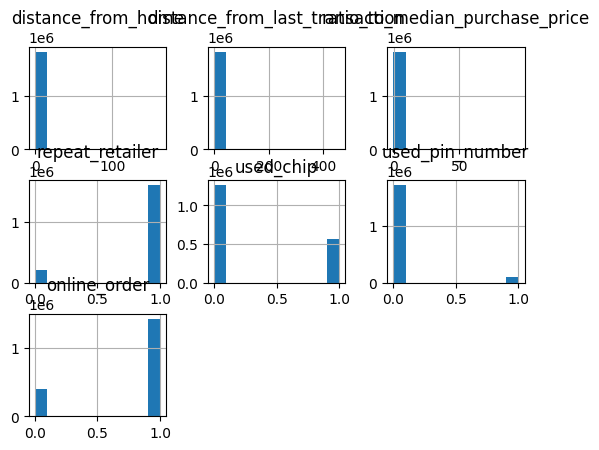

In [11]:
X.hist()

# Models

### Basic logistic regression

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

logit_model = LogisticRegression()
logit_model.fit(X_train, y_train)
y_preds = logit_model.predict(X_test)

In [13]:
for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
1.0 : 0.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0


Metrics

In [14]:
print(f'Accuracy: {logit_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')

Accuracy: 0.94090220496988
Precision: 0.9341383036196651


In [15]:
# now I want to see the regression coefficients
dict(zip(logit_model.coef_.flatten(), X.columns))

{1.898129063156303: 'distance_from_home',
 1.2724835865817399: 'distance_from_last_transaction',
 3.3849288232197785: 'ratio_to_median_purchase_price',
 -1.4389158053537217: 'repeat_retailer',
 -1.1807244117456892: 'used_chip',
 -10.129979585703895: 'used_pin_number',
 5.014253653697402: 'online_order'}

These coefficients look really solid:

- Holding all else constant, for every unit increase in `ratio_to_median_purchase_price` we expect an increase of __2.99__ in likelihood that the purchase was __fraudulent__.
- Holding all else constant, when the purchase was made with a `repeat_retailer` we expect an increase of __0.97__ in likelihood that the purchase was __legit__.
- Holding all else constant, when the purchase was made with a `used_pin_number` we expect an increase of __4.38__ in likelihood that the purchase was __legit__.
- Holding all else constant, when the purchase was made with a `online_order` we expect an increase of __3.34__ in likelihood that the purchase was __fraudulent__.

### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_preds = decision_tree_model.predict(X_test)

In [17]:
for pred, actual in zip(y_test[:20], y_preds[:20]):
    print(f'{actual} : {pred}')

0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
1.0 : 1.0
0.0 : 0.0
0.0 : 0.0
1.0 : 1.0
1.0 : 1.0


In [18]:
print(f'Accuracy: {decision_tree_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')

Accuracy: 0.9999616479335085
Precision: 0.9999615998595652


### XGBoost

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_preds = xgb_model.predict(X_test)

In [20]:
print(f'Accuracy: {xgb_model.score(X_test, y_test)}')
print(f'Precision: {precision_score(y_test, y_preds)}')

Accuracy: 0.9985727552398511
Precision: 0.9980109153077328
